# Tutorial 5. Python
### scikit-learn - Python Power to create Models.


import pandas as pd
from sklearn import datasets

### Load the Iris dataset
iris = datasets.load_iris()

### Convert it into a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

### Describe the statistics
iris_df.describe()

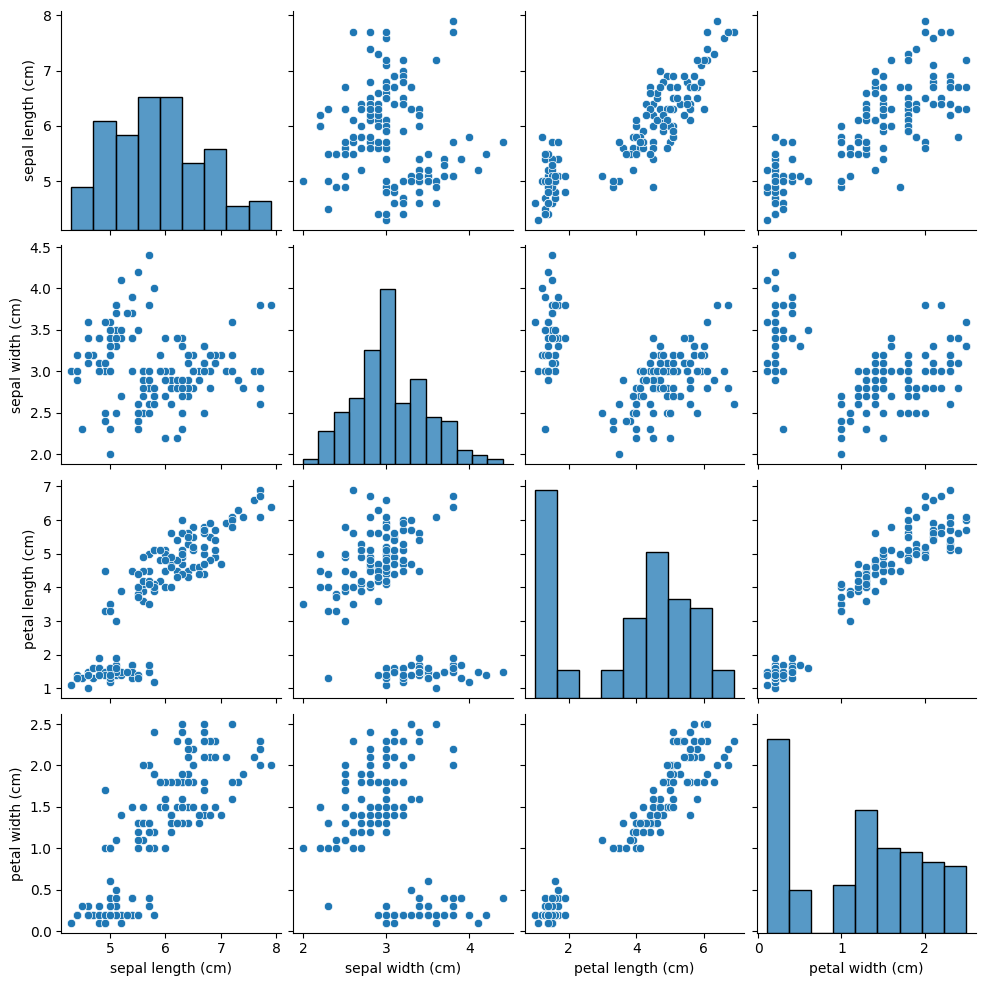

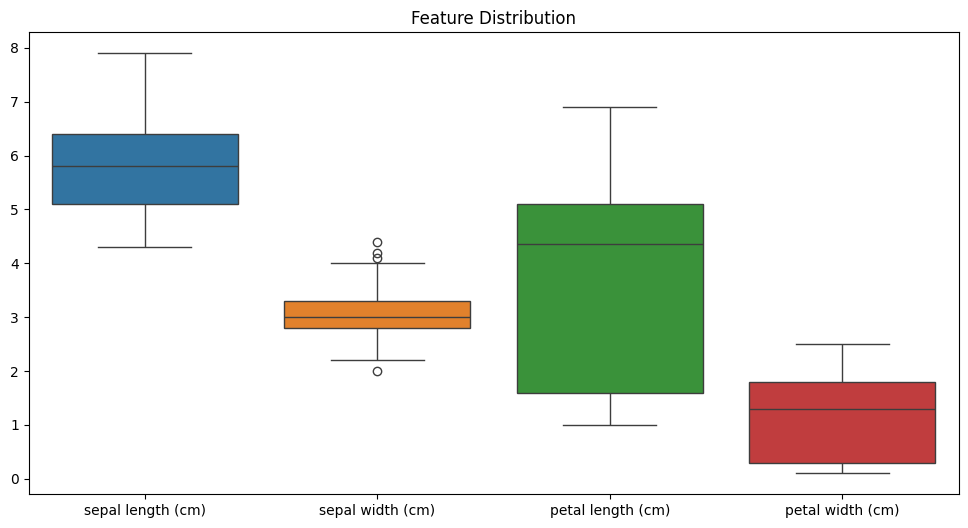

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(iris_df)
plt.show()

# Add the target (species) to the DataFrame for visualization
iris_df['species'] = iris.target

# Visualize the distribution of each feature using a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=iris_df.drop(columns='species'))
plt.title('Feature Distribution')
plt.show()

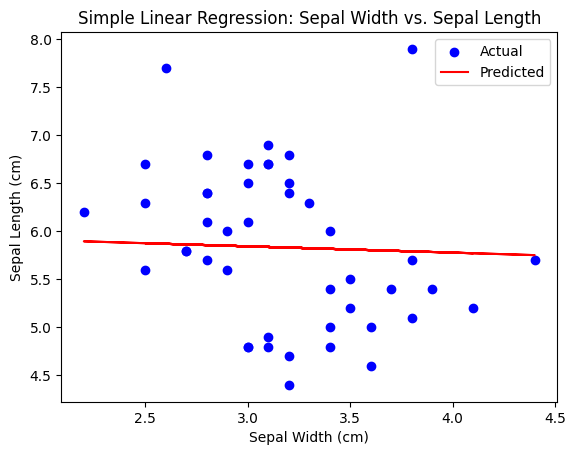

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting only Sepal Length and Sepal Width for simple linear regression
X = iris_df[['sepal width (cm)']]  # Predictor
y = iris_df['sepal length (cm)']    # Response

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Visualize the linear regression fit
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression: Sepal Width vs. Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

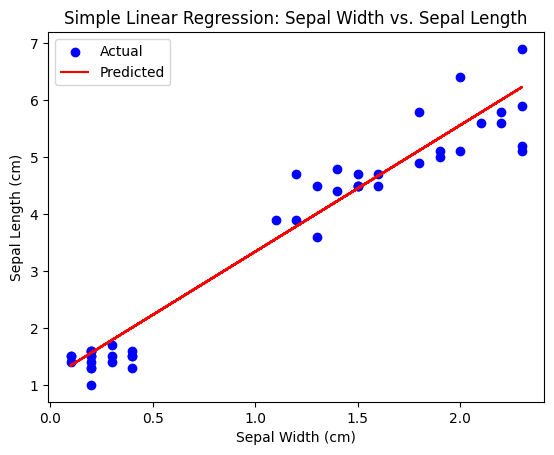

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting only Petal Length and Petal Width for simple linear regression
X = iris_df[['petal width (cm)']]  # Predictor
y = iris_df['petal length (cm)']    # Response

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Visualize the linear regression fit
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression: Sepal Width vs. Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

Mean Squared Error: 0.09811742166101381
R-squared: 0.8525836334296238


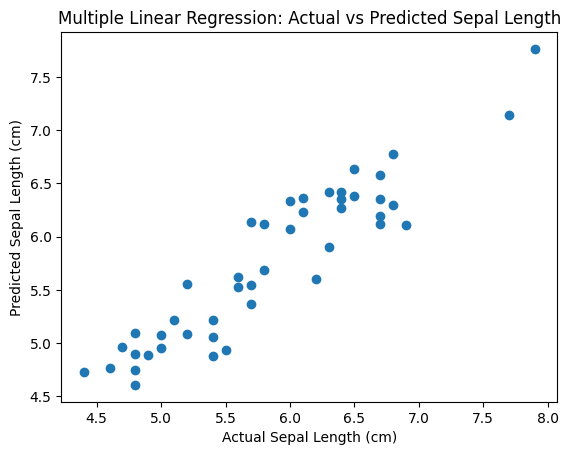

The equation for multiple linear regression:
Sepal Length = 1.76 + (0.66 * sepal width (cm)) + (0.76 * petal length (cm)) + (-0.69 * petal width (cm))


In [5]:
# All features (excluding target/species) as predictors
X = iris_df.drop(columns=['species', 'sepal length (cm)'])
y = iris_df['sepal length (cm)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the multiple linear regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)

# Calculate performance metrics (optional)
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred)
plt.title('Multiple Linear Regression: Actual vs Predicted Sepal Length')
plt.xlabel('Actual Sepal Length (cm)')
plt.ylabel('Predicted Sepal Length (cm)')
plt.show()

# Print the equation of the multiple linear regression model
intercept = mlr.intercept_
coefficients = mlr.coef_

# Feature names (excluding the response variable and species)
features = iris_df.columns.drop(['species', 'sepal length (cm)'])

# Construct the regression equation as a string
equation = f"Sepal Length = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"

# Print the regression equation
print("The equation for multiple linear regression:")
print(equation)